<a href="https://colab.research.google.com/github/luarias2405/TFM/blob/main/VersionYoloV8_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementacion YoloV8


Importación de Liberias

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage import morphology
from scipy.ndimage.morphology import binary_fill_holes as bfh
from google.colab import drive
from skimage.measure import regionprops
from skimage.measure import label
from skimage.morphology import convex_hull_image
import os 
from PIL import Image
import glob
import random
from splitfolders.split import ratio

<ipython-input-1-ace0d4ead016>:6: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_fill_holes as bfh


Conexión con Google Drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Realizamos la Partición de Train,Valid y Test

In [ ]:
import splitfolders
input_folder = '/content/gdrive/MyDrive/TFM/DATANew'
splitfolders.ratio(input_folder,output="/content/gdrive/MyDrive/TFM1/DATANew/dataset",
                   seed=42,ratio=(.7,.2,.1),
                   group_prefix=None)

Generar los labels para el conjunto de test


1.   Generamos los recuadros que distinguen la mitosis en cada una de las máscaras de los parches.
2.   Adicional generamos las coordenadas de dicho recuadros y estas imágenes y .txt se van guardando en un nuevo folder donde se almacena la imagen junto con su txt que contiene la clase, el centro del recuadro, el ancho y la altura.


In [ ]:
path="/content/gdrive/MyDrive/TFM1/DATANew/dataset/test/images/"
pathMask="/content/gdrive/MyDrive/TFM/MaskPatch/"

c=0
listImg=[]
for filename in os.listdir(path):
  base=os.path.splitext(filename)[0]
  file= pathMask+base+'.bmp'
  img= io.imread(file)
  rgb=img/255.0
  M=rgb.copy()
  img_gaus=M.copy()
  img_gaus=(img_gaus*255).astype('uint8')
  img_g = cv2.GaussianBlur(img_gaus, (5,5), 0)
  t, mask = cv2.threshold(img_g,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  mask=mask.astype('bool')
  clean_img=morphology.remove_small_objects(mask,300)
  h, w = clean_img.shape
  ref = np.zeros((h+2, w+2), np.uint8)
  mask_fill=clean_img.copy().astype('uint8')
  cv2.floodFill(mask_fill, ref, (0,0), 0)
  cv2.floodFill(mask_fill, ref, (h-2,w-2), 0)

# Rellenar los lúmenes con la función binary_fill_holes de la librería scipy.ndimage.morphology
# Visualizar la máscara resultante
  bordes = mask_fill.copy()
  filled_bordes = bfh(bordes)
  img_lleno=filled_bordes.astype('uint8')
  conts,num= cv2.findContours(img_lleno, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  print(img_lleno.max())
  bordes = mask_fill.copy()
  filled_bordes = bfh(img)
  cancer,numero=label(filled_bordes,return_num=True)
  if numero >0 :
    lumenes=filled_bordes.astype('uint8')
    lab,num=label(lumenes,return_num=True)
    v,c=np.unique(lab,return_counts=True)
    objeto=lab.astype("uint8")
    prop=regionprops(objeto)
    print(numero)
    pathFile="/content/gdrive/MyDrive/TFM1/DATANew/dataset/test/labels/"+filename
    base=os.path.splitext(pathFile)[0]
    file = open(base+ ".txt", "w")
    for j in range(numero):
      #area_objeto=prop[0].area
      #area_objeto
      y1,x1,y2,x2=regionprops(objeto)[j].bbox
      print(y1,x1,y2,x2)
      x1=x1-13
      x2=x2+13
      y1=y1-13
      y2=y2+13
      altura=y2-y1
      ancho=x2-x1
      centrox=x2-(ancho/2)
      centroy= y2-(altura/2)
      file.write("0"+" "+str(round(centrox/512,3))+" "+str(round(centroy/512,3))+" "+str(round(ancho/512,3))+" "+str(round(altura/512,3))+"\n")
    file.close()

Generar los labels para el conjunto de Train

Generamos los recuadros que distinguen la mitosis en cada una de las máscaras de los parches.
Adicional generamos las coordenadas de dicho recuadros y estas imágenes y .txt se van guardando en un nuevo folder donde se almacena la imagen junto con su txt que contiene la clase, el centro del recuadro, el ancho y la altura.

In [ ]:
path="/content/gdrive/MyDrive/TFM1/DATANew/dataset/train/images/"
pathMask="/content/gdrive/MyDrive/TFM/MaskPatch/"

c=0
listImg=[]
for filename in os.listdir(path):
  base=os.path.splitext(filename)[0]
  file= pathMask+base+'.bmp'
  img= io.imread(file)
  rgb=img/255.0
  M=rgb.copy()
  img_gaus=M.copy()
  img_gaus=(img_gaus*255).astype('uint8')
  img_g = cv2.GaussianBlur(img_gaus, (5,5), 0)
  t, mask = cv2.threshold(img_g,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  mask=mask.astype('bool')
  clean_img=morphology.remove_small_objects(mask,300)
  h, w = clean_img.shape
  ref = np.zeros((h+2, w+2), np.uint8)
  mask_fill=clean_img.copy().astype('uint8')
  cv2.floodFill(mask_fill, ref, (0,0), 0)
  cv2.floodFill(mask_fill, ref, (h-2,w-2), 0)

# Rellenar los lúmenes con la función binary_fill_holes de la librería scipy.ndimage.morphology
# Visualizar la máscara resultante
  bordes = mask_fill.copy()
  filled_bordes = bfh(bordes)
  img_lleno=filled_bordes.astype('uint8')
  conts,num= cv2.findContours(img_lleno, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  print(img_lleno.max())
  bordes = mask_fill.copy()
  filled_bordes = bfh(img)
  cancer,numero=label(filled_bordes,return_num=True)
  if numero >0 :
    lumenes=filled_bordes.astype('uint8')
    lab,num=label(lumenes,return_num=True)
    v,c=np.unique(lab,return_counts=True)
    objeto=lab.astype("uint8")
    prop=regionprops(objeto)
    print(numero)
    pathFile="/content/gdrive/MyDrive/TFM1/DATANew/dataset/train/labels/"+filename
    base=os.path.splitext(pathFile)[0]
    file = open(base+ ".txt", "w")
    for j in range(numero):
      #area_objeto=prop[0].area
      #area_objeto
      y1,x1,y2,x2=regionprops(objeto)[j].bbox
      print(y1,x1,y2,x2)
      x1=x1-13
      x2=x2+13
      y1=y1-13
      y2=y2+13
      altura=y2-y1
      ancho=x2-x1
      centrox=x2-(ancho/2)
      centroy= y2-(altura/2)
      file.write("0"+" "+str(round(centrox/512,3))+" "+str(round(centroy/512,3))+" "+str(round(ancho/512,3))+" "+str(round(altura/512,3))+"\n")
    file.close()

Generar los labels para el conjunto de Validación

Generamos los recuadros que distinguen la mitosis en cada una de las máscaras de los parches.
Adicional generamos las coordenadas de dicho recuadros y estas imágenes y .txt se van guardando en un nuevo folder donde se almacena la imagen junto con su txt que contiene la clase, el centro del recuadro, el ancho y la altura.

In [ ]:
path="/content/gdrive/MyDrive/TFM1/DATANew/dataset/val/images/"
pathMask="/content/gdrive/MyDrive/TFM/MaskPatch/"

c=0
listImg=[]
for filename in os.listdir(path):
  base=os.path.splitext(filename)[0]
  file= pathMask+base+'.bmp'
  img= io.imread(file)
  rgb=img/255.0
  M=rgb.copy()
  img_gaus=M.copy()
  img_gaus=(img_gaus*255).astype('uint8')
  img_g = cv2.GaussianBlur(img_gaus, (5,5), 0)
  t, mask = cv2.threshold(img_g,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  mask=mask.astype('bool')
  clean_img=morphology.remove_small_objects(mask,300)
  h, w = clean_img.shape
  ref = np.zeros((h+2, w+2), np.uint8)
  mask_fill=clean_img.copy().astype('uint8')
  cv2.floodFill(mask_fill, ref, (0,0), 0)
  cv2.floodFill(mask_fill, ref, (h-2,w-2), 0)

# Rellenar los lúmenes con la función binary_fill_holes de la librería scipy.ndimage.morphology
# Visualizar la máscara resultante
  bordes = mask_fill.copy()
  filled_bordes = bfh(bordes)
  img_lleno=filled_bordes.astype('uint8')
  conts,num= cv2.findContours(img_lleno, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  print(img_lleno.max())
  bordes = mask_fill.copy()
  filled_bordes = bfh(img)
  cancer,numero=label(filled_bordes,return_num=True)
  if numero >0 :
    lumenes=filled_bordes.astype('uint8')
    lab,num=label(lumenes,return_num=True)
    v,c=np.unique(lab,return_counts=True)
    objeto=lab.astype("uint8")
    prop=regionprops(objeto)
    print(numero)
    pathFile="/content/gdrive/MyDrive/TFM1/DATANew/dataset/val/labels/"+filename
    base=os.path.splitext(pathFile)[0]
    file = open(base+ ".txt", "w")
    for j in range(numero):
      #area_objeto=prop[0].area
      #area_objeto
      y1,x1,y2,x2=regionprops(objeto)[j].bbox
      print(y1,x1,y2,x2)
      x1=x1-13
      x2=x2+13
      y1=y1-13
      y2=y2+13
      altura=y2-y1
      ancho=x2-x1
      centrox=x2-(ancho/2)
      centroy= y2-(altura/2)
      file.write("0"+" "+str(round(centrox/512,3))+" "+str(round(centroy/512,3))+" "+str(round(ancho/512,3))+" "+str(round(altura/512,3))+"\n")
    file.close()
  

In [3]:
%cd /content/gdrive/MyDrive/TFM1

/content/gdrive/MyDrive/TFM1


Clonamos el git de ultralitics

In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 5703, done.
remote: Counting objects: 100% (622/622), done.
remote: Compressing objects: 100% (325/325), done.
remote: Total 5703 (delta 353), reused 471 (delta 288), pack-reused 5081
Receiving objects: 100% (5703/5703), 4.66 MiB | 13.04 MiB/s, done.
Resolving deltas: 100% (3722/3722), done.
Updating files: 100% (189/189), done.


In [4]:
%cd /content/gdrive/MyDrive/TFM1/ultralytics

/content/gdrive/MyDrive/TFM1/ultralytics


Instalación de Requerimientos

In [ ]:
!pip install -r requirements.txt

Intalación de Ultralytics

In [ ]:
!pip install ultralytics

Accedemos al Modelo **yolov8m**

In [7]:
from ultralytics import YOLO
model= YOLO()
model= YOLO("yolov8m.pt")

In [8]:
%cd /content/gdrive/MyDrive/TFM1/DATANew

/content/gdrive/MyDrive/TFM1/DATANew


Entranamiento

In [9]:
model.train(data="custom_data.yaml", epochs=150)

New https://pypi.org/project/ultralytics/8.0.58 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.50 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=custom_data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classe

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.Conv                  [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.Conv                  [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.C2f                   [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.Conv                  [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.C2f                   [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.Conv                  [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.C2f                   [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

Predicción

In [11]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [12]:
!yolo task=segment mode=predict model="/content/gdrive/MyDrive/TFM1/ultralytics/runs/detect/train12/weights/best.pt" source="/content/gdrive/MyDrive/TFM1/DATANew/dataset/test/images" save=True

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/113 /content/gdrive/MyDrive/TFM1/DATANew/dataset/test/images/A00_02_1_5.jpg: 640x640 2 Mitosiss, 15.3ms
image 2/113 /content/gdrive/MyDrive/TFM1/DATANew/dataset/test/images/A00_04_4_2.jpg: 640x640 1 Mitosis, 18.2ms
image 3/113 /content/gdrive/MyDrive/TFM1/DATANew/dataset/test/images/A00_09_1_1.jpg: 640x640 1 Mitosis, 16.9ms
image 4/113 /content/gdrive/MyDrive/TFM1/DATANew/dataset/test/images/A00_09_2_2.jpg: 640x640 1 Mitosis, 19.5ms
image 5/113 /content/gdrive/MyDrive/TFM1/DATANew/dataset/test/images/A01_00_2_3.jpg: 640x640 (no detections), 16.6ms
image 6/113 /content/gdrive/MyDrive/TFM1/DATANew/dataset/test/images/A01_00_4_5.jpg: 640x640 1 Mitosis, 15.0ms
imag

Implementamos código, para la validación de la predicción con nuestras coordenadas almacenadas en el archivo .txt correspondiente a cada imagen

0 0.584 0.577 0.121 0.15

[[168 154 150 ...  83  88  94]
 [164 149 144 ...  88  92  97]
 [151 142 144 ...  93  95  98]
 ...
 [104  94  85 ...  81  90 102]
 [126 101  83 ...  81  89 103]
 [137 101  80 ...  81  88 103]]


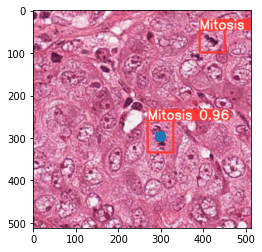

In [21]:
%matplotlib inline
with open('/content/gdrive/MyDrive/TFM1/DATANew/dataset/test/labels/A01_08_2_7.txt') as f:
  for line in f:
    print(line)
    #firstline = line.readlines()
    data = line.split()
    #print(data)
    x=round(float(data[1])*512,2)
    y=round(float(data[2])*512,2)
    #print(x,y)
    img= io.imread("/content/gdrive/MyDrive/TFM1/ultralytics/runs/detect/predict2/A01_08_2_7.jpg")
    print(img[:,:,1])
    plt.plot(x,y,marker="o",markersize=10)
    plt.imshow(img)